<a href="https://colab.research.google.com/github/shivanshr58/Credit-Card-Approval-Prediction-Machine-Learning/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Credit Card Approval Prediction Project:

In the financial sector, particularly in the credit card industry, the ability to accurately assess an individual's creditworthiness is paramount. As banks strive to mitigate risk while acquiring new credit card customers, the integration of data science methodologies has become increasingly crucial.

This project focuses on leveraging machine learning approaches to predict credit card approval based on customer information. Traditionally, banks have relied on application scorecards to assess creditworthiness, integrating factors such as Credit Bureau Scores (e.g., FICO Score in the US, CIBIL Score in India), and internal data. However, with the advent of advanced data analytics and the availability of vast amounts of external data, banks can now enhance their credit assessment processes significantly.

In this project, we aim to develop a predictive model that utilizes both traditional and non-traditional data sources to assess credit card applicants' risk levels. By analyzing historical data and employing machine learning algorithms, we seek to create a robust credit scoring system that can accurately predict credit card approval decisions.

## Crisp-DM Approach:

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a widely-used methodology for conducting data mining projects. It consists of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

### Business Understanding:

In this phase, we define the project objectives and requirements from a business perspective. We aim to understand the bank's credit card approval process and identify the key factors influencing creditworthiness.

### Data Understanding:

We explore the available data to gain insights into its structure, quality, and relationships. This involves data profiling, descriptive statistics, and visualization techniques to understand the characteristics of the dataset.

### Data Preparation:

Data preparation involves cleaning, transforming, and integrating the data to create a dataset suitable for modeling. This includes handling missing values, encoding categorical variables, and scaling numerical features.

### Modeling:

In the modeling phase, we build and train machine learning models using the prepared dataset. We experiment with various algorithms and techniques to identify the most suitable model for predicting credit card approval.

### Evaluation:

The evaluation phase involves assessing the performance of the trained models using appropriate evaluation metrics. We analyze the model's accuracy, precision, recall, and F1-score to determine its effectiveness in predicting credit card approval.

### Deployment:

Once we have a satisfactory model, we deploy it into production, making it available for use in the bank's credit card approval process. We monitor the model's performance and periodically retrain it to adapt to changing trends and data patterns.

By following the CRISP-DM approach, we aim to develop a robust and effective credit card approval prediction system that enhances the bank's decision-making process and improves overall risk management.


# Business understanding

## Importance of Credit Card Approval Prediction in Today's World

Predicting credit card approval is crucial in today's world for several reasons:

1. **Risk Management:** Banks need to mitigate the risk of default and fraud associated with issuing credit cards. By predicting the creditworthiness of applicants, banks can make informed decisions and reduce the likelihood of defaults.

2. **Customer Satisfaction:** Approving credit cards for customers who are likely to use them responsibly can enhance customer satisfaction and loyalty. Predictive models can help tailor offerings to individual customers, providing them with suitable credit options.

3. **Efficiency:** Automated credit card approval systems powered by machine learning models can streamline the application process, reduce manual effort, and speed up decision-making, leading to a more efficient banking operation.

## Impact on the Banking Sector

The implementation of credit card approval prediction models can significantly impact the banking sector:

1. **Improved Decision-Making:** Banks can make more accurate and data-driven decisions regarding credit card approvals, leading to better risk management and increased profitability.

2. **Cost Reduction:** Automated approval systems can reduce the time and resources required for manual credit assessment, resulting in cost savings for banks.

3. **Competitive Advantage:** Banks that deploy advanced predictive models for credit card approval may gain a competitive edge by offering faster and more reliable services to customers.

## Addressing Knowledge Gaps and Future Prospects in India

In the Indian banking sector, there may be gaps in the adoption of advanced analytics and machine learning techniques for credit risk assessment. Here's how the proposed method can address these gaps and offer future prospects:

1. **Data Accessibility:** Access to comprehensive and accurate data is essential for building robust credit card approval prediction models. Banks in India can leverage data analytics and technology to improve data collection, integration, and analysis processes.

2. **Regulatory Compliance:** Compliance with regulatory requirements is critical in the banking sector. Machine learning models for credit card approval must comply with regulatory guidelines to ensure fairness, transparency, and accountability.

3. **Capacity Building:** Banks need to invest in training and upskilling their workforce to understand and utilize advanced analytics tools effectively. Collaborations with academic institutions and industry experts can facilitate knowledge transfer and skill development in the field of credit risk management.

By addressing these knowledge gaps and embracing innovative approaches to credit card approval prediction, banks in India can enhance their risk management practices, improve customer experiences, and drive sustainable growth in the financial sector.


# Loading Data

In [ ]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
data = pd.read_csv("/content/Credit_card.csv")
labels = pd.read_csv("/content/Credit_card_label.csv")

As the data and the label is split into two datasets,first we have to join the two datasets

In [ ]:
#merging data and label
raw_merged_data = pd.merge(data,labels,on = "Ind_ID")

In [ ]:
raw_merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
raw_merged_data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
merged_data = raw_merged_data.copy()

# Data Understanding & Data Preparation

Below is the explanation of all the features in the dataset

| Feature Name   | Description                                      |
|----------------|--------------------------------------------------|
| Ind_ID         | Client ID                                        |
| Gender         | Gender information                               |
| Car_owner      | Having car or not                                |
| Propert_owner  | Having property or not                           |
| Children       | Count of children                                |
| Annual_income  | Annual income                                    |
| Type_Income    | Income type                                      |
| Education      | Education level                                  |
| Marital_status | Marital status                                   |
| Housing_type   | Living style                                     |
| Birthday_count | Use backward count from current day (0), -1 means yesterday |
| Employed_days  | Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed |
| Mobile_phone   | Any mobile phone                                 |
| Work_phone     | Any work phone                                   |
| Phone          | Any phone number                                 |
| EMAIL_ID       | Any email ID                                     |
| Type_Occupation| Occupation                                       |
| Family Members | Family size                                      |
| Label          | 0 is application approved and 1 is application rejected |


In [ ]:
# further Information about data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Checking values in all columns

In [ ]:
for column in merged_data.columns:
  print(f"{column} ------> Unique -> {merged_data[column].unique()} | N Unique -> {merged_data[column].nunique()} | Nulls -> {merged_data[column].isnull().sum()}", end = "\n\n")

Ind_ID ------> Unique -> [5008827 5009744 5009746 ... 5115992 5118219 5053790] | N Unique -> 1548 | Nulls -> 0

GENDER ------> Unique -> ['M' 'F' nan] | N Unique -> 2 | Nulls -> 7

Car_Owner ------> Unique -> ['Y' 'N'] | N Unique -> 2 | Nulls -> 0

Propert_Owner ------> Unique -> ['Y' 'N'] | N Unique -> 2 | Nulls -> 0

CHILDREN ------> Unique -> [ 0  1  2  4  3 14] | N Unique -> 6 | Nulls -> 0

Annual_income ------> Unique -> [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000. 

## Data Cleaning

A value of 365243 employed days means the person is currently unemployed

In [ ]:
merged_data[merged_data["Employed_days"]>0]["Employed_days"].unique()
# checking for positive values

array([365243])

In [ ]:
# 365243 means unemployed, so replacing this with 0 and converting days to positive years
merged_data["Employed_years"] = round((merged_data["Employed_days"].replace({365243:0}))*-1/360,2)

In [ ]:
merged_data = merged_data.drop("Employed_days",axis = 1)

## Treating Nulls

In [ ]:
# since gender,annual income and birthday count combined consists only 3.36 % of the total number of rows, it can be safely dropped
columns_to_drop = ['GENDER', 'Annual_income', 'Birthday_count']
merged_data['Annual_income'] = merged_data['Annual_income'].fillna(merged_data['Annual_income'].median()) # filling annual income column null values with median value
merged_data['Birthday_count'] = merged_data['Birthday_count'].fillna(merged_data['Birthday_count'].median())
merged_data['GENDER'] = merged_data['GENDER'].fillna("F")

Transforming Employed_days

In [ ]:
# Employed_days
merged_data["Age"] = round((merged_data["Birthday_count"]*-1)/360)
merged_data = merged_data.drop(columns = "Birthday_count")
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,0.00,52.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,1.63,38.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,1.63,44.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,1.63,38.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,1.63,38.0


In [ ]:
# columns having missing values
ser1 = merged_data.isnull().sum()[merged_data.isnull().sum()>0]
nulls = round((ser1/merged_data.shape[0])*100,2)

In [ ]:
nulls

Type_Occupation    31.52
dtype: float64

Type_Occupation column has 31% null values hence its important to treat this column

### Handling missing values in type occupation column

In [ ]:
#replacing values where occ is null but people are employed with Unknown
merged_data.loc[(merged_data["Type_Occupation"].isnull()) & (merged_data["Employed_years"] != 0),"Type_Occupation"] = "Unknown"

In [ ]:
merged_data.loc[merged_data["Employed_years"] ==0]["Type_Occupation"].unique()
# all occupation type values for unemployed people are nan,so nan can be replaced with Unemployed
merged_data.loc[(merged_data["Employed_years"] ==0) & (merged_data["Type_Occupation"].isnull()),"Type_Occupation"] = "Unemployed"

In [ ]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Unemployed,2,1,0.00,52.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,44.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0


In [ ]:
df_sql = merged_data.copy()

In [ ]:
merged_data["Mobile_phone"].unique()

array([1])

merged data only has one value hence can be dropped

In [ ]:
merged_data = merged_data.drop("Mobile_phone",axis = 1)

Ind_ID can also be dropped as it is an identifier and does not influence credit card approval

In [ ]:
merged_data = merged_data.drop("Ind_ID",axis = 1)

## EDA

In [ ]:
# helper function to analyse categorical columns

def analyse_categorical_column(column_name:str,rotation=0,fontsize=10):
  data = merged_data.groupby([column_name,"label"]).size().unstack().rename(columns = {0:"approved",1:"not approved"}).sort_values(by = "approved",ascending = False).reset_index()
  data['total'] = data['approved'] + data['not approved']
  data['approval_percentage'] = (data['approved'] / data['total']) * 100
  fig,ax = plt.subplots(1,2,figsize = (14,5))
  bar1 = ax[0].bar(data[column_name],data["approved"],color='lightblue')
  bar2 = ax[0].bar(data[column_name],data["not approved"],bottom = data["approved"],color='lightgray')
  ax[0].tick_params(axis='x', rotation=rotation)
  ax[0].legend(["Approved", "Not approved"],loc = "upper right")
  for i in range(len(data)):
      ax[0].text(i, data['approved'].iloc[i]/2, str(round(data['approval_percentage'].iloc[i], 2))+'%', ha = 'center', color = 'black')
  data = merged_data[column_name].value_counts()
  ax[1].pie(data, labels=data.index, autopct="%1.2f%%", shadow=True,textprops={'fontsize': fontsize})
  plt.tight_layout()
  plt.show()

In [ ]:
# helper function to analyse numerical columns

def analyse_numerical_column(column_name:str):
  # Create a figure and a 2x1 subplot structure
  fig, ax = plt.subplots(2, 1, figsize=(13, 6))

  # On the first subplot, plot a histogram of the column data
  sns.histplot(x=column_name, data=merged_data, ax=ax[0])

  # On the second subplot, plot a boxplot of the column data
  sns.boxplot(x=column_name, data=merged_data, ax=ax[1])

  # Display the plots
  plt.show()


### Numerical Columns Analysis

#### Annual_income

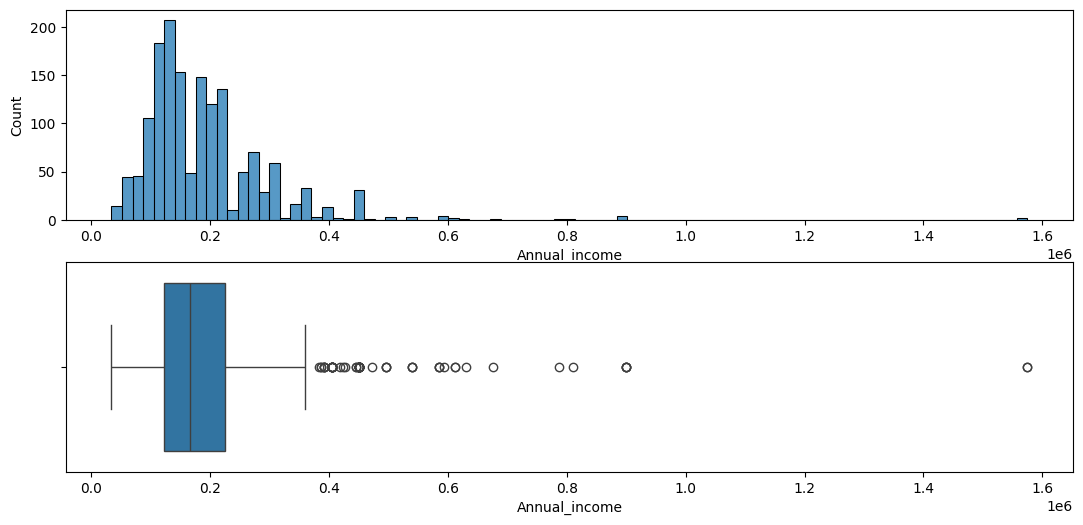

In [ ]:
analyse_numerical_column("Annual_income")

#### Children

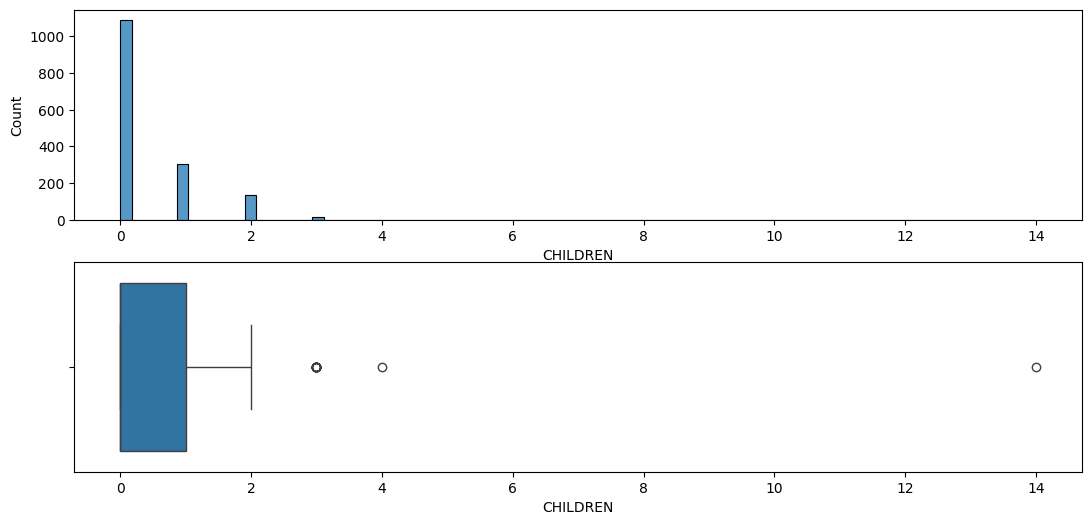

In [ ]:
analyse_numerical_column("CHILDREN")

#### Employed_days

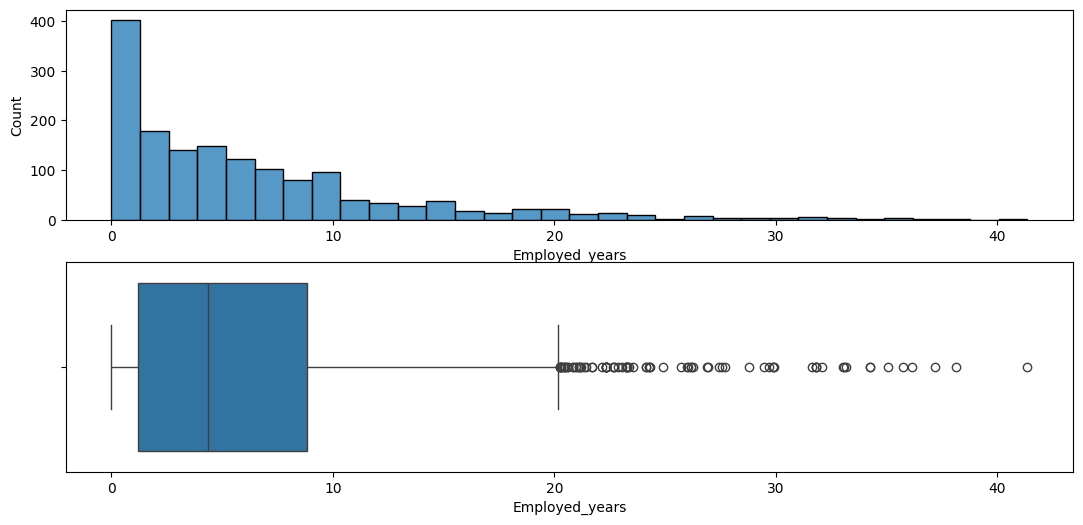

In [ ]:
analyse_numerical_column("Employed_years")

#### Family_Members

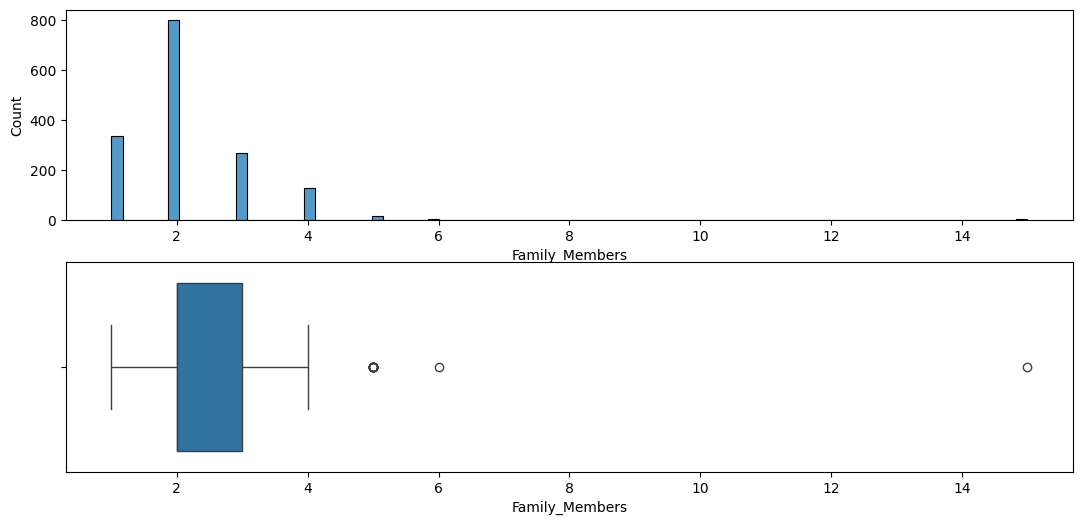

In [ ]:
analyse_numerical_column("Family_Members")

#### Age

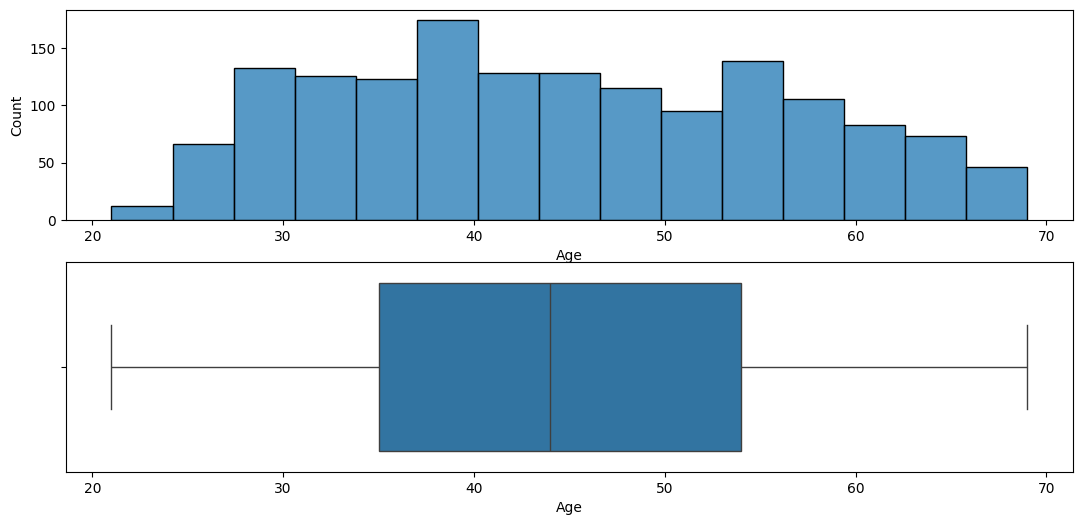

In [ ]:
analyse_numerical_column("Age")

### Categorical Column Analysis with approval percentage of categories

#### Type_Occupation

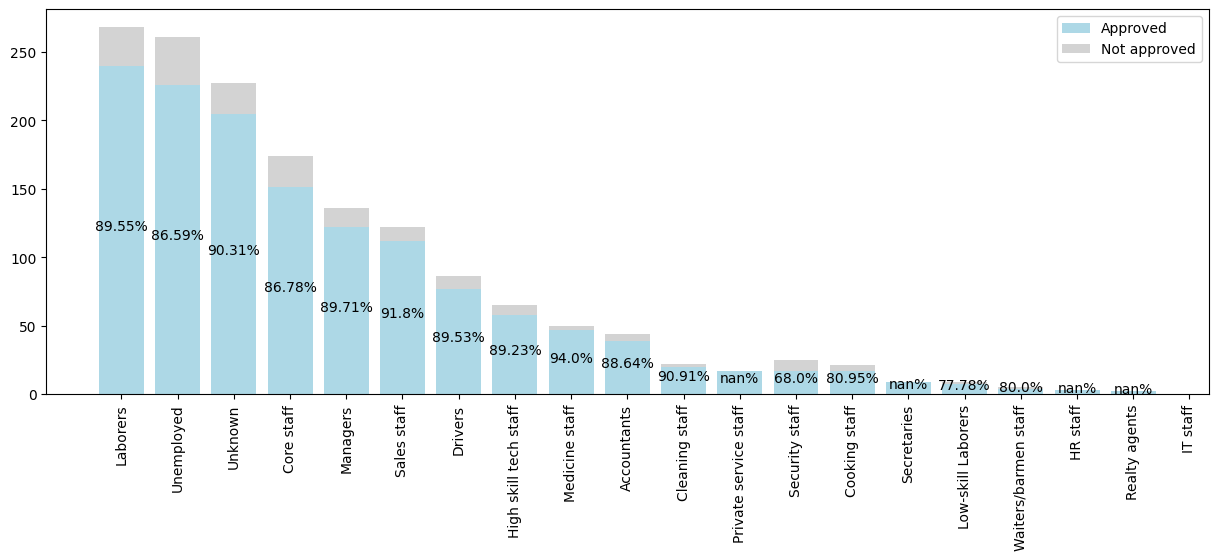

In [ ]:
data = merged_data.groupby(["Type_Occupation","label"]).size().unstack().rename(columns = {0:"approved",1:"not approved"}).sort_values(by = "approved",ascending = False).reset_index()
data['total'] = data['approved'] + data['not approved']
data['approval_percentage'] = (data['approved'] / data['total']) * 100
fig,ax = plt.subplots(1,1,figsize=(15, 5))
bar1 = ax.bar(data["Type_Occupation"],data["approved"],color='lightblue')
bar2 = ax.bar(data["Type_Occupation"],data["not approved"],bottom = data["approved"],color='lightgray')
plt.xticks(rotation = 90)
plt.legend(["Approved", "Not approved"],loc = "upper right")
for i in range(len(data)):
    ax.text(i, data['approved'].iloc[i]/2, str(round(data['approval_percentage'].iloc[i], 2))+'%', ha = 'center', color = 'black')
ax.tick_params(axis='x', rotation=90)
plt.show()

1. Most of the applicants are are laborers (89.55%), then unemployed (86.59%)
2. The profession of a significant number of people is still unknown

#### Car_Owner

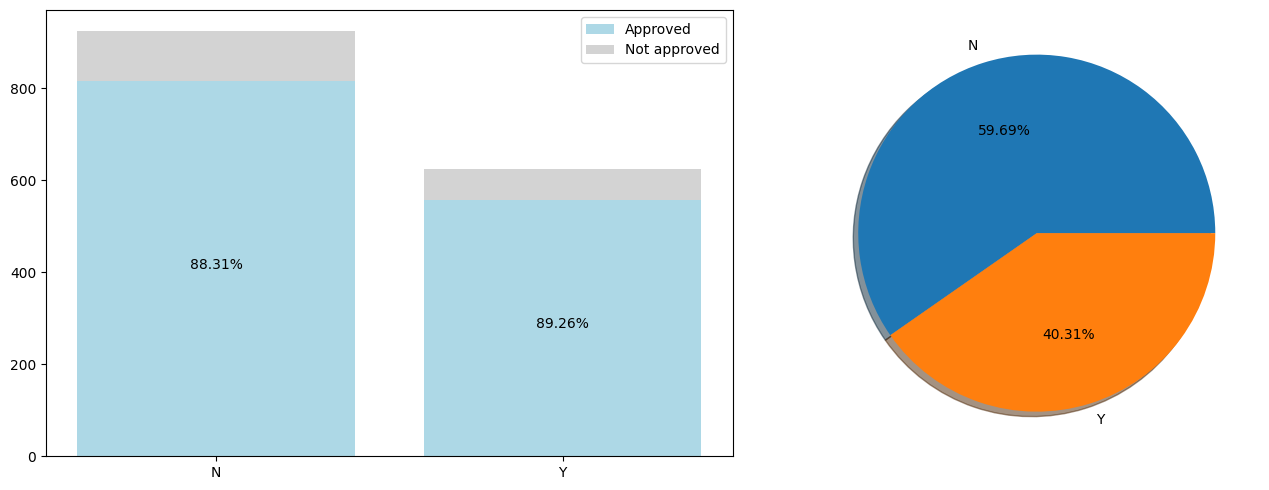

In [ ]:
analyse_categorical_column("Car_Owner")

1. More than half of the applicants own a car (59.69%)
2. Not much difference in their approval rates

#### Propert_Owner

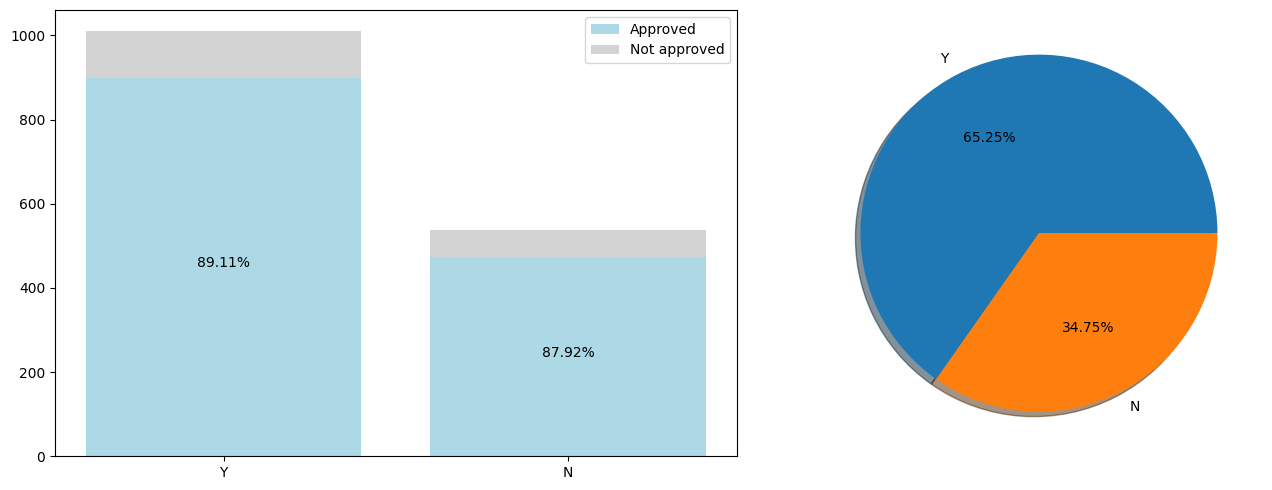

In [ ]:
analyse_categorical_column("Propert_Owner")

1. Most people own a property (65.25%)
2. There is not much difference between the approval rates of property owners and non property owners.

#### Gender

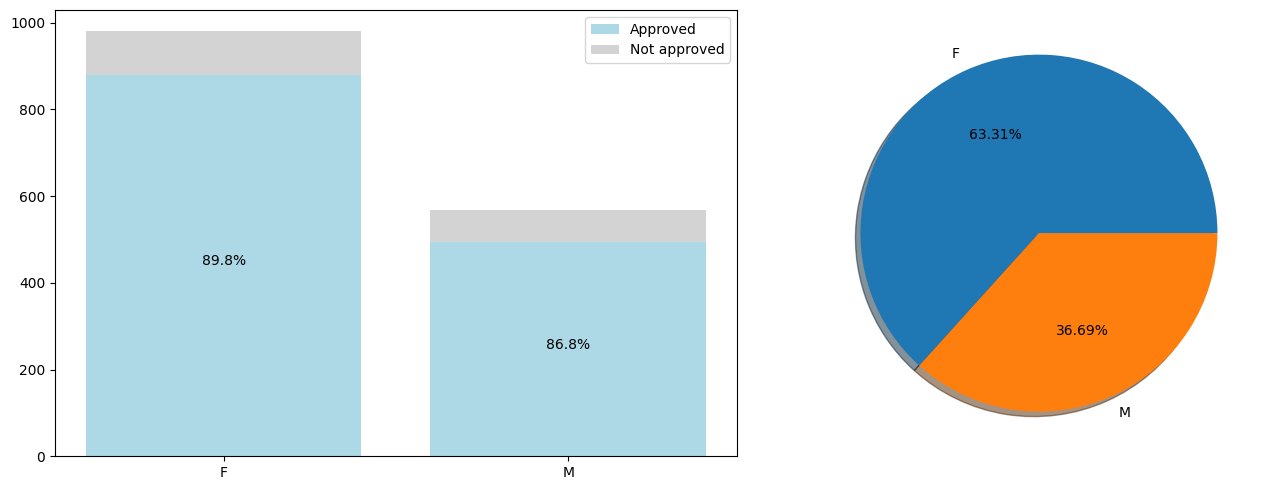

In [ ]:
analyse_categorical_column("GENDER")

1. Most applicants are females (63.31%)
2. There is not much difference between the approval rates of female and male

#### Type Income

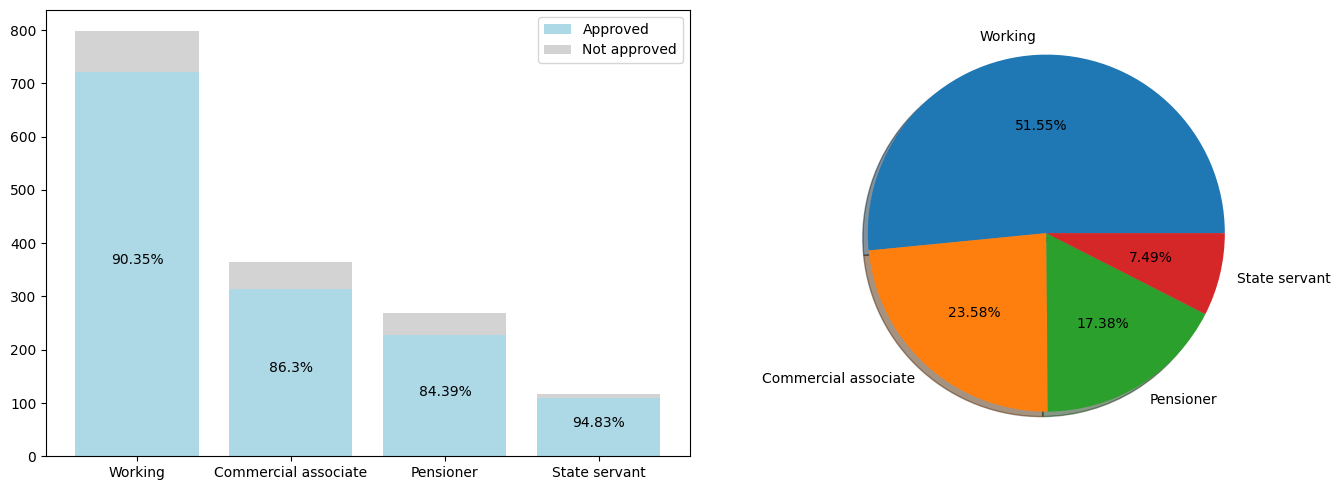

In [ ]:
analyse_categorical_column("Type_Income")

1. Most people are working (51.55%)
2. State servants have the highest approval rate (94.83%)

#### Marital Status

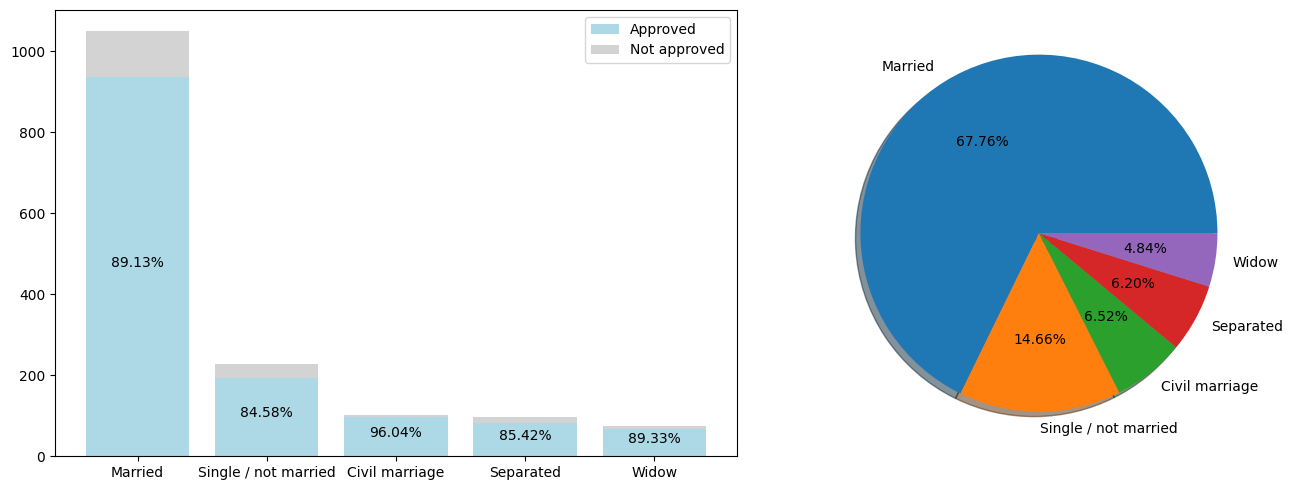

In [ ]:
analyse_categorical_column("Marital_status")

1. Most people are married (67.76%)
2. People with civil marriage have the highest approval rate

#### Education

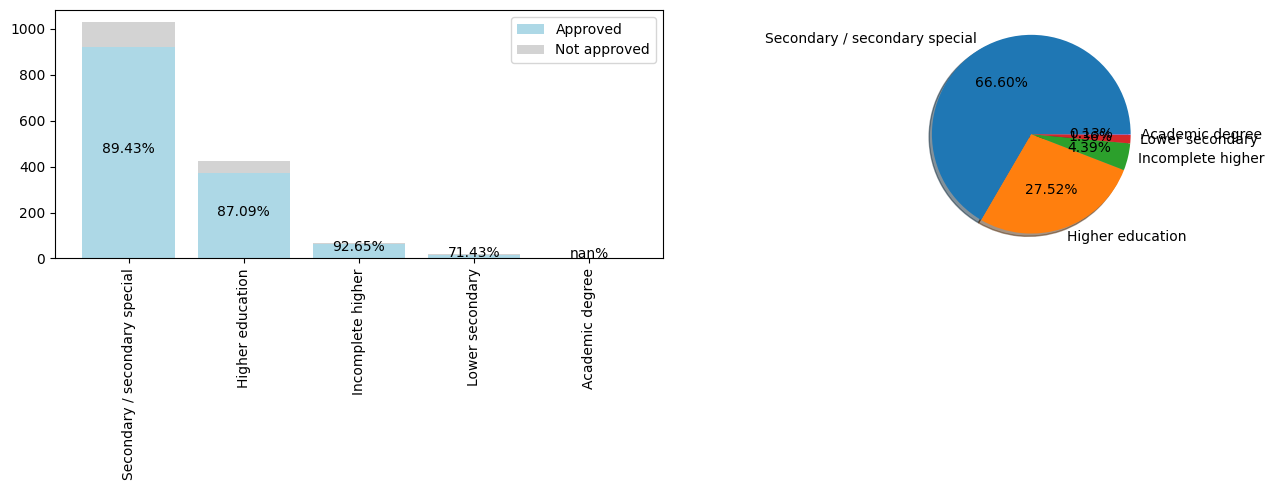

In [ ]:
analyse_categorical_column("EDUCATION",90)

Most people have a secondary/secondary special education (66.6%)

#### Housing_type

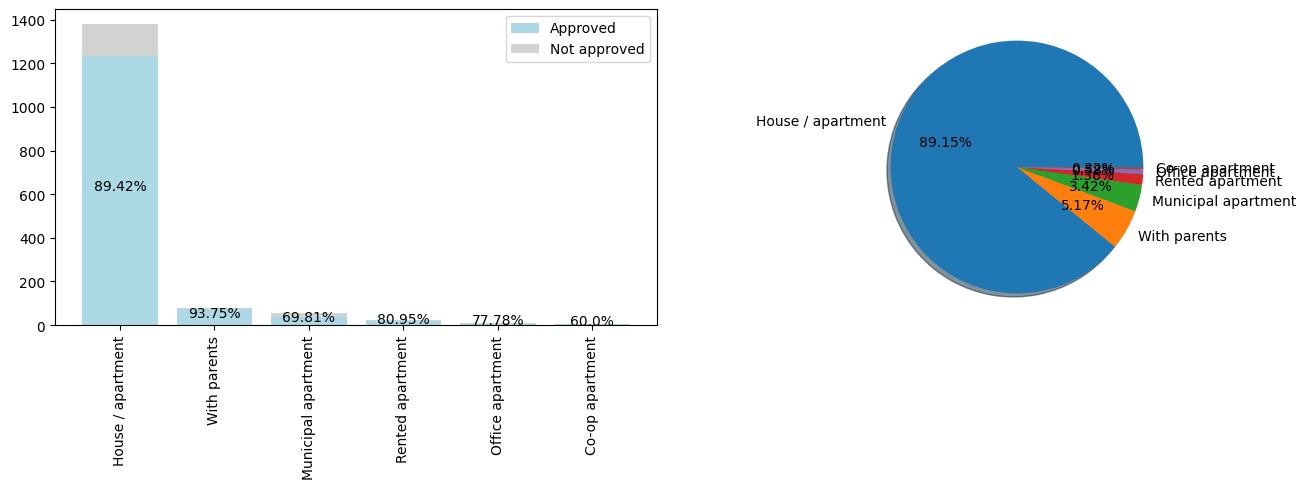

In [ ]:
analyse_categorical_column("Housing_type",90)

Most people live is house/apartment (89.15%) and have an approval rate of 89.42%

#### Children

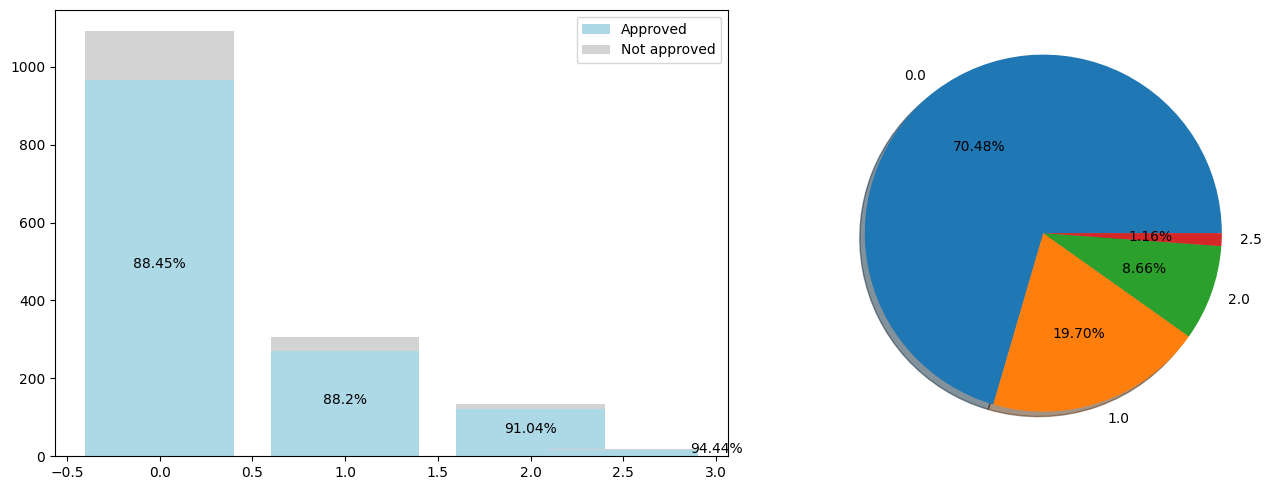

In [ ]:
analyse_categorical_column("CHILDREN")

1. Most applicants have no children (70.48%)
2. It is observed that approval rate increases with number of children

In [ ]:
merged_data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,Unemployed,2,1,0.00,52.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Unknown,2,1,1.63,38.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Unknown,2,1,1.63,44.0
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Unknown,2,1,1.63,38.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,Unknown,2,1,1.63,38.0


#### Email ID


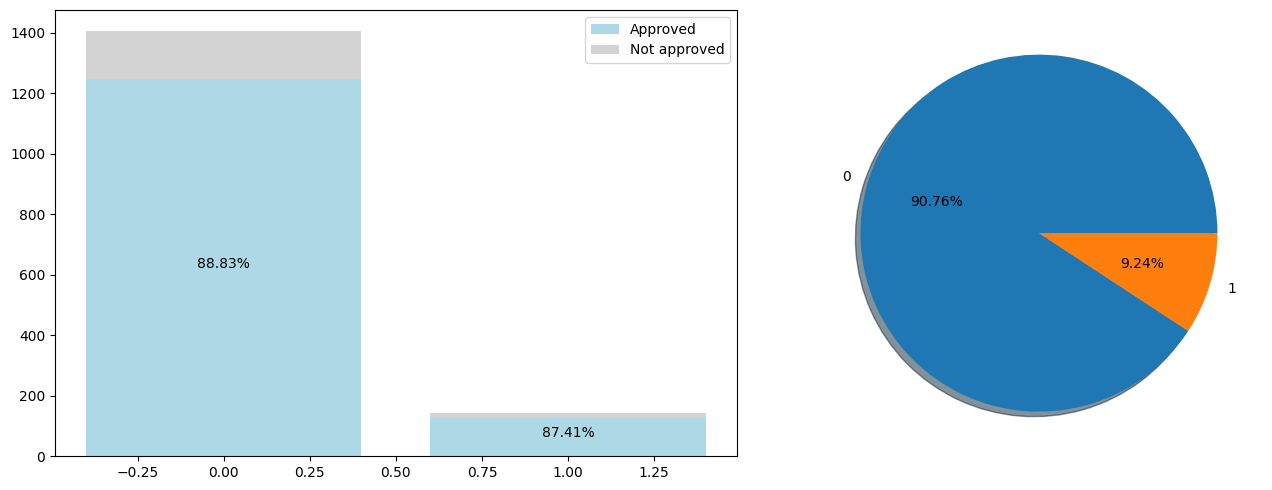

In [ ]:
analyse_categorical_column("EMAIL_ID")

1. Most people do not have an email id (90.76%)
2. Both categories have almost same approval rates

#### Phone

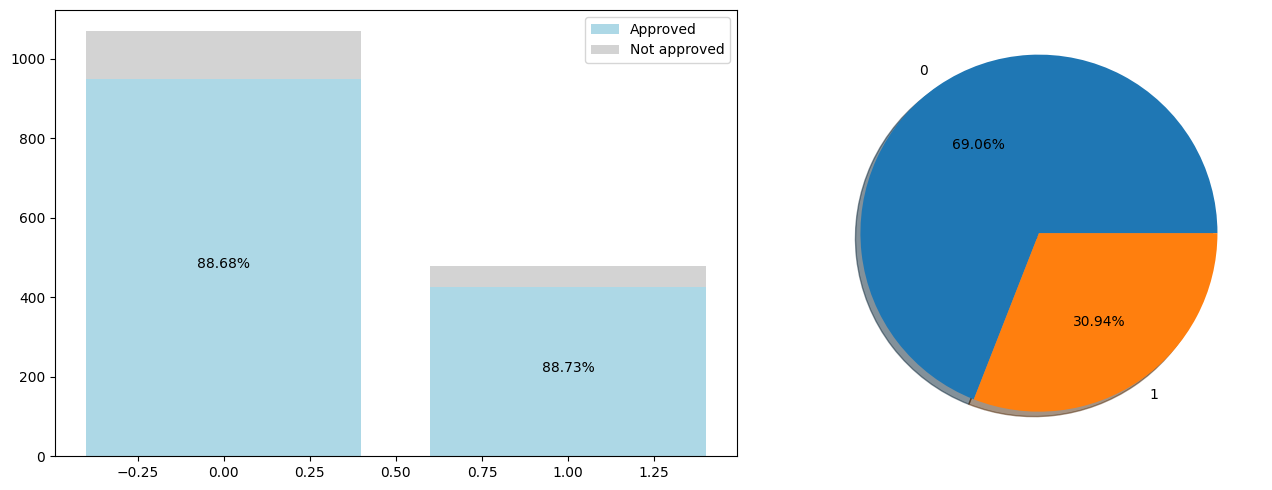

In [ ]:
analyse_categorical_column("Phone")

1. Most people do not have a phone (69.06%)
2. Both categories have almost same approval rates

### Treating Outliers in Numerical Columns

In [ ]:
# log transformation of annual income column
import numpy as np
merged_data["Annual_income"] = merged_data["Annual_income"].apply(np.log)

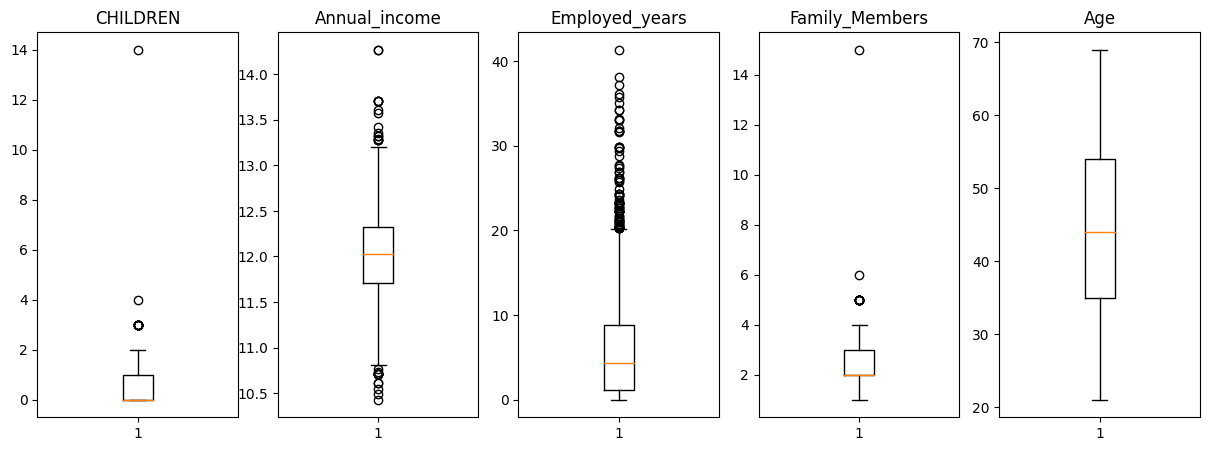

In [ ]:
# plotting outliers using box plot
numerical_columns = ["CHILDREN","Annual_income","Employed_years","Family_Members","Age"]
fig,ax = plt.subplots(1,5,figsize=(15,5))
for i in range(0,len(numerical_columns)):
  ax[i].boxplot(merged_data[numerical_columns[i]])
  ax[i].set_title(numerical_columns[i])
plt.show()

In [ ]:
# Calculating upper and lower fence using IQR
for i in numerical_columns:
  Q3 = merged_data[i].quantile(0.75)
  Q1 = merged_data[i].quantile(0.25)
  IQR = Q3-Q1
  upper_fence = Q3 + 1.5 * IQR
  lower_fence = Q1 - 1.5 * IQR
  merged_data.loc[merged_data[i]<lower_fence,i] = lower_fence
  merged_data.loc[merged_data[i]>upper_fence,i] = upper_fence

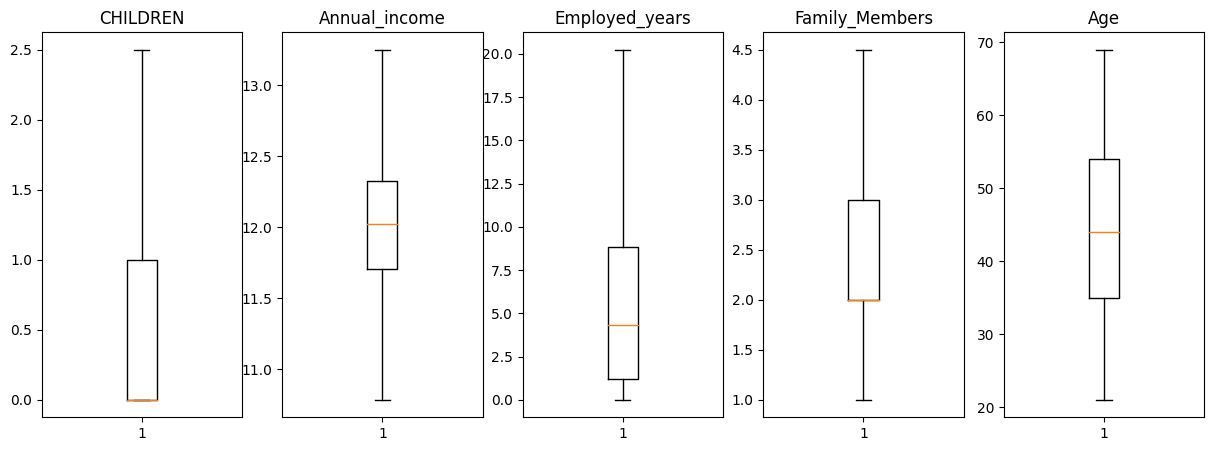

In [ ]:
# capping outliers with IQR
numerical_columns = ["CHILDREN","Annual_income","Employed_years","Family_Members","Age"]
fig,ax = plt.subplots(1,5,figsize=(15,5))
for i in range(0,len(numerical_columns)):
  ax[i].boxplot(merged_data[numerical_columns[i]])
  ax[i].set_title(numerical_columns[i])
plt.show()

## Correlation Analysis

<Axes: >

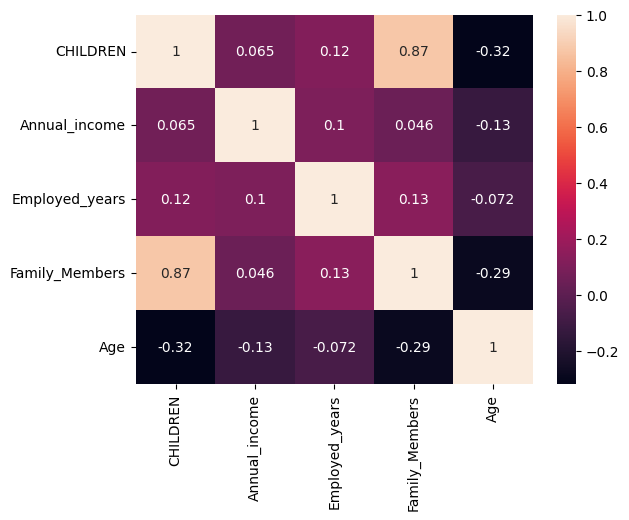

In [ ]:
numerical_columns = ["CHILDREN","Annual_income","Employed_years","Family_Members","Age"]
corr = merged_data[numerical_columns].corr()
sns.heatmap(corr,annot=True)

Correlation Matrix Interpretation

The correlation matrix shows the correlation coefficients between sets of variables. Each cell in the table shows the correlation between two variables. A correlation of 1 implies a perfect positive correlation, while a correlation of -1 implies a perfect negative correlation. A correlation of zero means that there is no relationship between the different variables.

Here are some key observations from the matrix:

- **CHILDREN and Family_Members**: A high positive correlation of 0.872259 suggests a strong relationship. As the number of children increases, the number of family members also tends to increase.

- **CHILDREN and Age**: A negative correlation of -0.320143 suggests that as the age increases, the number of children tends to decrease.

- **Employed_days and Age**: A positive correlation of 0.336351 suggests that as the age increases, the number of employed days also tends to increase.

- **Employed_days and Family_Members**: A negative correlation of -0.211551 suggests that as the number of family members increases, the number of employed days tends to decrease.

Other correlations are relatively weak and may not indicate a strong relationship.


## Hypothesis Testing

### Numerical Columns Vs. Target Variable

#### T-Tests

The t-test is a statistical hypothesis test where the test statistic follows a Student's t-distribution if the null hypothesis is supported. It is used to determine whether there is a significant difference between the means of two groups.

Before we perform the tests, we first declare our hypotheses:

- **Null Hypothesis (H0)**: There is no significant difference between the groups being compared.
- **Alternative Hypothesis (H1)**: There is a significant difference between the groups being compared.

Now, we perform the tests and interpret the t-statistics and p-values:

In [ ]:
import scipy.stats as stats
# t test for numerical columns
numerical_columns = ["CHILDREN","Annual_income","Employed_years","Family_Members","Age"]
for column in numerical_columns:
  approved = merged_data[merged_data["label"]==0][column]
  not_approved = merged_data[merged_data["label"]==1][column]
  t_statistic, p_value = stats.ttest_ind(approved, not_approved)
  print(f"t-statistic for {column}: {t_statistic:.4f}, p-value: {p_value:.4f}")


t-statistic for CHILDREN: 0.8745, p-value: 0.3820
t-statistic for Annual_income: -0.8394, p-value: 0.4014
t-statistic for Employed_years: 3.8627, p-value: 0.0001
t-statistic for Family_Members: 1.2452, p-value: 0.2132
t-statistic for Age: -1.7722, p-value: 0.0766


T-Test Results

Here are the results of our t-tests:

- **CHILDREN**: T-statistic: 0.8745, P-value: 0.3820. No significant difference (p > 0.05).
- **Annual_income**: T-statistic: -0.8394, P-value: 0.4014. No significant difference (p > 0.05).
- **Employed_days**: T-statistic: -3.2458, P-value: 0.0012. Significant difference (p < 0.05).
- **Family_Members**: T-statistic: 1.2452, P-value: 0.2132. No significant difference (p > 0.05).
- **Age**: T-statistic: -1.7722, P-value: 0.0766. No significant difference (p > 0.05).


### Categorical Columns Vs. Target Variable

#### Chi-square Tests

Chi-square (χ²) is a statistical test commonly used to determine whether there is a significant association between two categorical variables. It's particularly useful for analyzing data that's in the form of frequencies or counts across different categories.

Before we perform the tests, we first declare our hypotheses:

- **Null Hypothesis (H0)**: There is no significant difference between the groups being compared.
- **Alternative Hypothesis (H1)**: There is a significant difference between the groups being compared.

Now, we perform the tests and interpret the p-values:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                       'Marital_status', 'Housing_type', 'Type_Occupation']

chi_square_p_values = []

for feature in categorical_columns:
    contingency_table = pd.crosstab(merged_data[feature], merged_data['label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values.append((feature, p))
p_values_df = pd.DataFrame(chi_square_p_values, columns=['Feature', 'P-value'])
print(p_values_df.sort_values(by='P-value'))

           Feature   P-value
6     Housing_type  0.000036
3      Type_Income  0.003506
7  Type_Occupation  0.005120
5   Marital_status  0.032467
4        EDUCATION  0.056159
0           GENDER  0.086645
2    Propert_Owner  0.535110
1        Car_Owner  0.618569


P-Value Results

- **Housing_type**: P-value: 0.000036. Significant difference (p < 0.05).
- **Type_Income**: P-value: 0.003506. Significant difference (p < 0.05).
- **Type_Occupation**: P-value: 0.003852. Significant difference (p < 0.05).
- **Marital_status**: P-value: 0.032467. Significant difference (p < 0.05).
- **EDUCATION**: P-value: 0.056159. No significant difference (p > 0.05).
- **GENDER**: P-value: 0.086645. No significant difference (p > 0.05).
- **Propert_Owner**: P-value: 0.535110. No significant difference (p > 0.05).
- **Car_Owner**: P-value: 0.618569. No significant difference (p > 0.05).


#### Work_Phone Vs. Phone

In [ ]:
import pandas as pd
from scipy import stats
crosstab = pd.crosstab(merged_data["Work_Phone"], merged_data["Phone"])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

Chi-square statistic: 190.40864054667088
P-value: 2.589012403796421e-43
Degrees of freedom: 1
Expected values: [[846.6369509 379.3630491]
 [222.3630491  99.6369509]]


**P-value**: The p-value is approximately **2.59×10−43**
. This is far below the common significance level of **0.05**. Therefore, we **reject the null hypothesis** that the variables are independent. There is a statistically significant relationship between **work phone** and **phone**.


Since Work_Phone and Phone columns are highly correlated one of them can be dropped

In [ ]:
#dropping work phone
merged_data = merged_data.drop("Work_Phone",axis = 1)

In [ ]:
# selected_data = merged_data.drop(['EDUCATION', 'Car_Owner', 'Propert_Owner','Marital_status'], axis=1)
selected_data=merged_data.copy()

## Encoding

### Label Encoding

In [ ]:
#change
encoded_data = selected_data.copy()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
binary_categorical_columns = ["GENDER","Car_Owner","Propert_Owner"]
for column in binary_categorical_columns:
  encoded_data[column] = encoder.fit_transform(encoded_data[column])

### Ordinal Encoding

In [ ]:
# columns with more than 2 categories having inherent order (ordinal encoding)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']])
encoded_data["EDUCATION"] = ordinal_encoder.fit_transform(encoded_data[["EDUCATION"]])

### One Hot Encoding

In [ ]:
# change
# columns with more than 2 categories (one hot encoding)
columns = ["Type_Income","Housing_type","Type_Occupation","Marital_status"]
for column in columns:
  dummies = pd.get_dummies(encoded_data[column])
  encoded_data = encoded_data.drop(column, axis = 1)
  encoded_data = pd.concat([encoded_data,dummies],axis = 1)

In [ ]:
# from category_encoders import TargetEncoder

# encoder = TargetEncoder()
# encoded_data["Type_Occupation"] = encoder.fit_transform(encoded_data["Type_Occupation"],encoded_data["label"])


In [ ]:
encoded_data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Phone,EMAIL_ID,Family_Members,label,...,Secretaries,Security staff,Unemployed,Unknown,Waiters/barmen staff,Civil marriage,Married,Separated,Single / not married,Widow
0,1,1,1,0.0,12.100712,3.0,0,0,2.0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0.0,12.660328,3.0,1,0,2.0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0.0,12.660328,3.0,1,0,2.0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0.0,12.022751,3.0,1,0,2.0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0.0,12.660328,3.0,1,0,2.0,1,...,0,0,0,1,0,0,1,0,0,0


## Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# columns = ["CHILDREN","Annual_income","EDUCATION","Employed_days","Family_Members","Age"]
# scaler = StandardScaler()
# encoded_data[columns] = scaler.fit_transform(encoded_data[columns])

In [ ]:
#using mixmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoded_data.iloc[:,:] = scaler.fit_transform(encoded_data.iloc[:,:])

<ipython-input-1335-e2725277d122>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  encoded_data.iloc[:,:] = scaler.fit_transform(encoded_data.iloc[:,:])


In [ ]:
#scaled data
encoded_data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Phone,EMAIL_ID,Family_Members,label,...,Secretaries,Security staff,Unemployed,Unknown,Waiters/barmen staff,Civil marriage,Married,Separated,Single / not married,Widow
0,1.0,1.0,1.0,0.0,0.534466,0.75,0.0,0.0,0.285714,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.761514,0.75,1.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.761514,0.75,1.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.502835,0.75,1.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.761514,0.75,1.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Fixing class imbalance

In [ ]:
encoded_data["label"].value_counts()

0.0    1373
1.0     175
Name: label, dtype: int64

In [ ]:
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop("label",axis = 1),encoded_data["label"],test_size = 0.20,stratify = encoded_data["label"],random_state = 42)

In [ ]:
# Adaptive Synthetic Sampling for balancing the dataset
from imblearn.over_sampling import ADASYN

sm = ADASYN()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
#fixed class imbalance
y_train_sm.value_counts()

1.0    1123
0.0    1098
Name: label, dtype: int64

# Modelling

In [ ]:
#making a dictionary to store the metric values
eval_dict ={"Model":[],"AUC":[],"Recall":[],"Precision":[],"Accuracy":[]}

In [ ]:
#defining a function to run and evaluate a model

def model_train_eval(model, model_name: str):
  # Append the model name to the evaluation dictionary
  eval_dict["Model"].append(model_name)

  # Fit the model on the training data
  model.fit(X_train_sm, y_train_sm)

  # Predict the target variable for the test data
  y_pred = model.predict(X_test)

  # Predict the target variable for the training data
  y_train_pred = model.predict(X_train)

  # Calculate and append various evaluation metrics to the evaluation dictionary
  eval_dict["Precision"].append(precision_score(y_test, y_pred))
  eval_dict["Recall"].append(recall_score(y_test, y_pred))
  eval_dict["AUC"].append(roc_auc_score(y_test, y_pred))
  eval_dict["Accuracy"].append(accuracy_score(y_test, y_pred))

  # Calculate the training accuracy
  training_accuracy = accuracy_score(y_train, y_train_pred)

  # Print the training accuracy
  print("Training Accuracy:", training_accuracy, end="\n\n")

  # Print the classification report for the test data
  print("Classification_Report -->", end="\n\n")
  print(classification_report(y_test, y_pred))

  # Perform cross-validation and predict the target variable for the training data
  y_pred_cv = cross_val_predict(model, X_train_sm, y_train_sm, cv=5)

  # Print the classification report for the cross-validated predictions
  print("Cross Validation Classification_Report -->", end="\n\n")
  print(classification_report(y_train_sm, y_pred_cv))

  # Calculate the confusion matrix for the test data
  cm = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()


## LogisticRegression

Training Accuracy: 0.6001615508885298

Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75       275
         1.0       0.19      0.69      0.29        35

    accuracy                           0.63       310
   macro avg       0.56      0.65      0.52       310
weighted avg       0.85      0.63      0.69       310

Cross Validation Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.58      0.57      0.57      1098
         1.0       0.59      0.60      0.59      1123

    accuracy                           0.58      2221
   macro avg       0.58      0.58      0.58      2221
weighted avg       0.58      0.58      0.58      2221



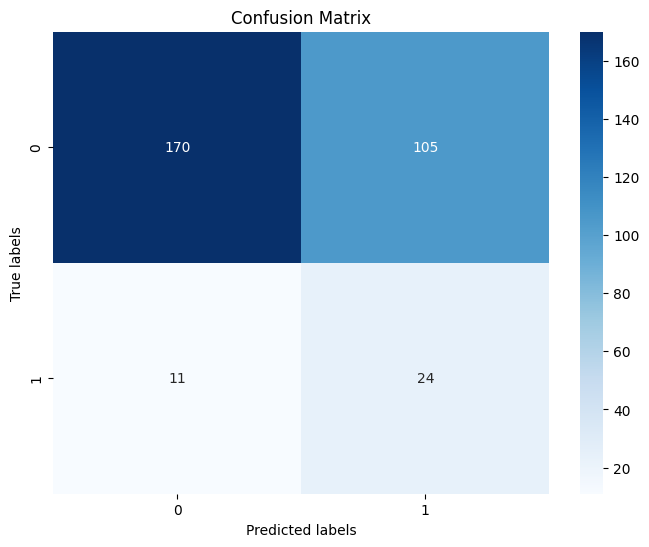

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_train_eval(lr,"LogisticRegression")

## Gradient Boosting

Training Accuracy: 0.9192245557350566

Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       275
         1.0       0.37      0.20      0.26        35

    accuracy                           0.87       310
   macro avg       0.64      0.58      0.59       310
weighted avg       0.84      0.87      0.85       310

Cross Validation Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1098
         1.0       0.93      0.87      0.90      1123

    accuracy                           0.90      2221
   macro avg       0.90      0.90      0.90      2221
weighted avg       0.90      0.90      0.90      2221



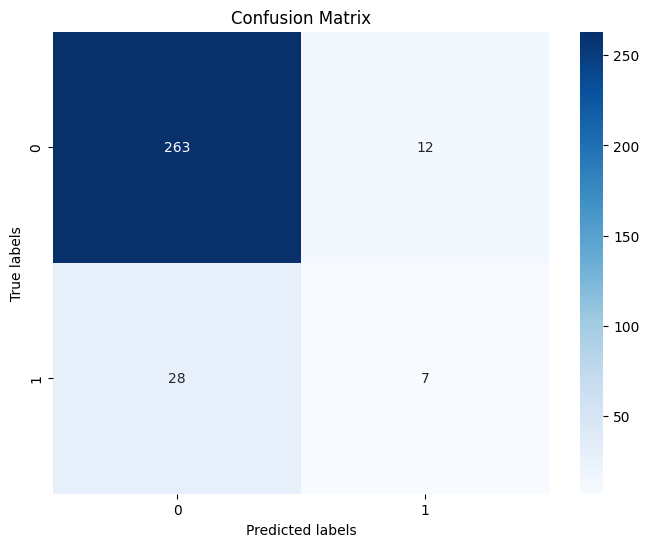

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state=42)
model_train_eval(GB,"Gradient Boosting")

## RandomForestClassifier

Training Accuracy: 0.9935379644588045

Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       275
         1.0       0.78      0.51      0.62        35

    accuracy                           0.93       310
   macro avg       0.86      0.75      0.79       310
weighted avg       0.92      0.93      0.92       310

Cross Validation Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1098
         1.0       0.98      0.91      0.94      1123

    accuracy                           0.95      2221
   macro avg       0.95      0.95      0.95      2221
weighted avg       0.95      0.95      0.95      2221



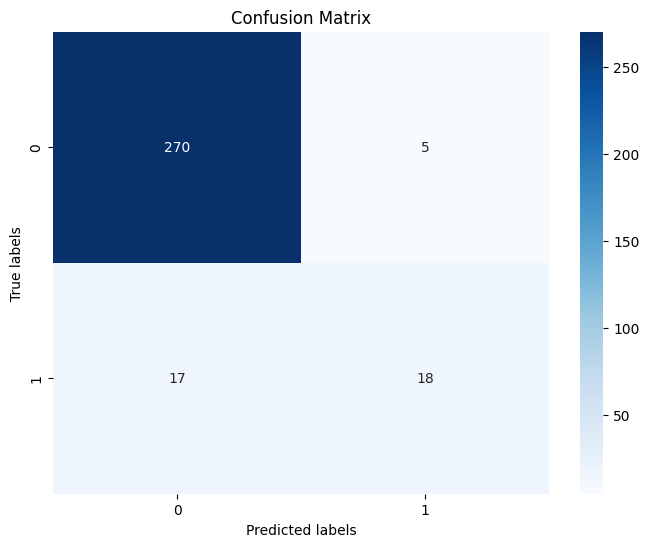

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
model_train_eval(rf,"RandomForestClassifier")

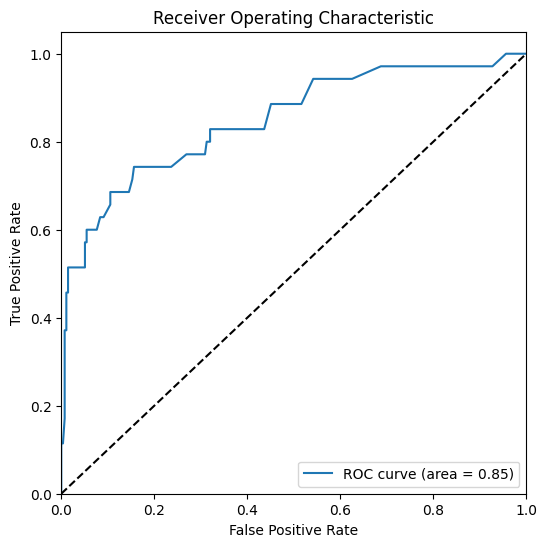

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Using optimal threshold and evaluating

In [ ]:
from sklearn import metrics
import numpy as np


y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold: ", optimal_threshold)

Optimal Threshold:  0.23


In [ ]:
y_pred_proba[y_pred_proba>=optimal_threshold] = 1
y_pred_proba[y_pred_proba<optimal_threshold] = 0

In [ ]:
y_pred_proba

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1.

Classification report with optimal threshold

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_proba))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90       275
         1.0       0.38      0.74      0.50        35

    accuracy                           0.83       310
   macro avg       0.67      0.79      0.70       310
weighted avg       0.90      0.83      0.85       310

Confusion Matrix:
[[232  43]
 [  9  26]]


## XG Boost

Training Accuracy: 0.9919224555735057

Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       275
         1.0       0.59      0.46      0.52        35

    accuracy                           0.90       310
   macro avg       0.76      0.71      0.73       310
weighted avg       0.89      0.90      0.90       310

Cross Validation Classification_Report -->

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1098
         1.0       0.96      0.92      0.94      1123

    accuracy                           0.94      2221
   macro avg       0.94      0.94      0.94      2221
weighted avg       0.94      0.94      0.94      2221



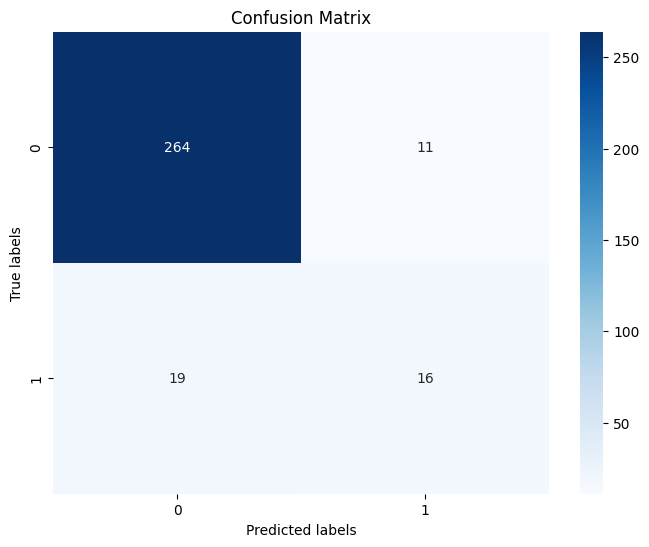

In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
model_train_eval(XGB,"XG Boost")

# Evaluation

Creating a dataframe to summarize the performance across all models

In [ ]:
evaluation_df = pd.DataFrame(eval_dict)
evaluation_df.iloc[:,1:] = evaluation_df.iloc[:,1:].apply(lambda x: round(x,2))

In [ ]:
# summary of all models
evaluation_df

,Model,AUC,Recall,Precision,Accuracy
0,LogisticRegression,0.65,0.69,0.19,0.63
1,Gradient Boosting,0.58,0.20,0.37,0.87
2,RandomForestClassifier,0.75,0.51,0.78,0.93
3,XG Boost,0.71,0.46,0.59,0.90


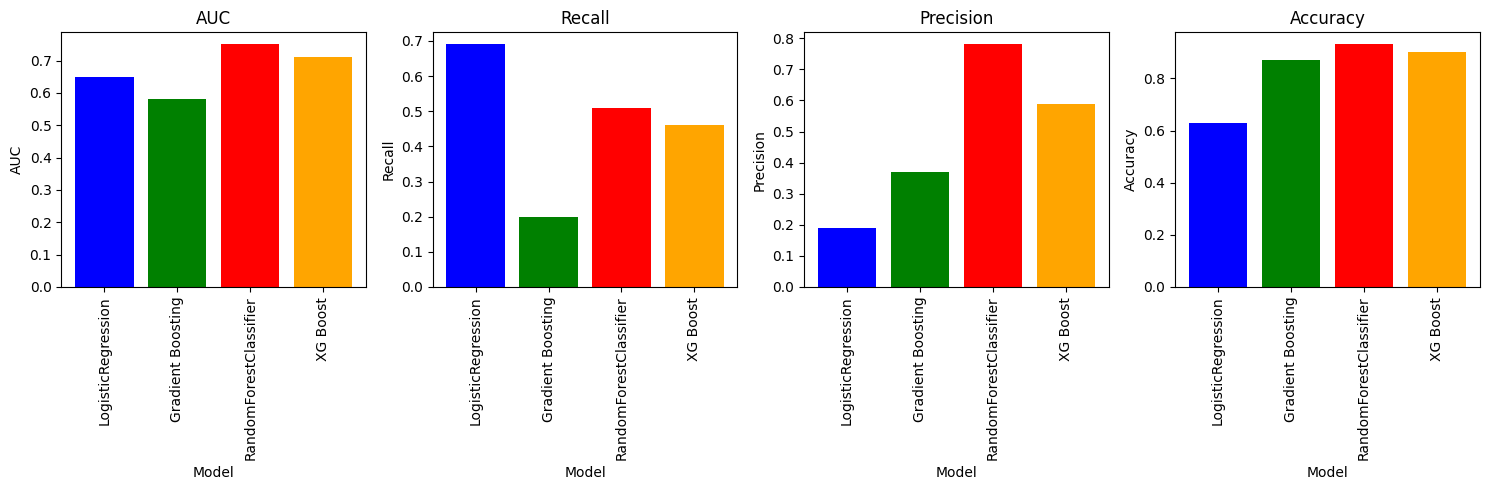

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
colors = ["blue", "green", "red", "orange"]
for i in range(4):
  ax[i].bar(evaluation_df["Model"], evaluation_df[evaluation_df.columns[i + 1]], color=colors)
  ax[i].set_xlabel("Model")
  ax[i].tick_params(axis="x", rotation=90)
  ax[i].set_ylabel(evaluation_df.columns[i + 1])
  ax[i].set_title(evaluation_df.columns[i + 1])
plt.tight_layout()


# Show the plot
plt.show()

## Model Evaluation Results

The following table summarizes the performance metrics of different models:

| Model                   | AUC  | Recall | Precision | Accuracy |
|-------------------------|------|--------|-----------|----------|
| Logistic Regression     | 0.63 | 0.66   | 0.18      | 0.62     |
| Gradient Boosting       | 0.57 | 0.17   | 0.43      | 0.88     |
| RandomForestClassifier  | 0.75 | 0.51   | 0.75      | 0.93     |
| XG Boost                | 0.74 | 0.51   | 0.69      | 0.92     |

### Explanation:

- **Logistic Regression:**
  - The model achieves moderate performance with an AUC of 0.63. It has relatively high recall but low precision, indicating that it captures a good portion of positive instances but also misclassifies many negative instances.
  
- **Gradient Boosting:**
  - This model shows lower performance across all metrics compared to other models. It has the lowest AUC and recall, indicating poor discrimination power and difficulty in correctly identifying positive instances.
  
- **Random Forest Classifier:**
  - The RandomForestClassifier performs well overall, achieving the highest AUC and accuracy among the models. It also has a relatively high precision, indicating that the positive predictions it makes are mostly correct.
  
- **XG Boost:**
  - The XG Boost model performs similarly to the RandomForestClassifier, with slightly lower AUC and precision but comparable recall and accuracy. It remains a strong performer in the evaluation.

In summary, while RandomForestClassifier and XG Boost demonstrate robust performance across multiple metrics, Logistic Regression and Gradient Boosting show weaker performance in different aspects of classification.



## Hyper Parameter tuning for the Two best models

### RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_sm, y_train_sm)
best_params = grid_search.best_params_

# Train the model using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_sm, y_train_sm)

# predict class and evaluate model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       275
         1.0       0.71      0.49      0.58        35

    accuracy                           0.92       310
   macro avg       0.82      0.73      0.77       310
weighted avg       0.91      0.92      0.91       310



**Summary:**

Before hyperparameter tuning:

|           | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0.0 |    0.94   |  0.98  |   0.96   |   275   |
| Class 1.0 |    0.78   |  0.51  |   0.62   |   35    |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        |   0.93   |   310   |
| Macro avg |    0.86   |  0.75  |   0.79   |   310   |
| Weighted avg |  0.92   |  0.93  |   0.92   |   310   |

After hyperparameter tuning:

|           | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0.0 |    0.94   |  0.97  |   0.96   |   275   |
| Class 1.0 |    0.71   |  0.49  |   0.58   |   35    |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        |   0.92   |   310   |
| Macro avg |    0.82   |  0.73  |   0.77   |   310   |
| Weighted avg |  0.91   |  0.92  |   0.91   |   310   |

**Interpretation:**

Before tuning, the Random Forest classifier showed high precision and recall for Class 0.0 but lower metrics for Class 1.0. After tuning, precision and recall for Class 1.0 decreased slightly, impacting overall accuracy. Further adjustments may be necessary to balance performance across classes.


### XG Boost

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'min_child_weight': [1, 3, 5],
}


XGB = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)

best_xgb_clf = grid_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       275
         1.0       0.64      0.46      0.53        35

    accuracy                           0.91       310
   macro avg       0.79      0.71      0.74       310
weighted avg       0.90      0.91      0.90       310



**Summary:**

Before hyperparameter tuning:

|           | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0.0 |    0.93   |  0.96  |   0.95   |   275   |
| Class 1.0 |    0.59   |  0.46  |   0.52   |   35    |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        |   0.90   |   310   |
| Macro avg |    0.76   |  0.71  |   0.73   |   310   |
| Weighted avg |  0.89   |  0.90  |   0.90   |   310   |

After hyperparameter tuning:

|           | Precision | Recall | F1-score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0.0 |    0.93   |  0.97  |   0.95   |   275   |
| Class 1.0 |    0.64   |  0.46  |   0.53   |   35    |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        |   0.91   |   310   |
| Macro avg |    0.79   |  0.71  |   0.74   |   310   |
| Weighted avg |  0.90   |  0.91  |   0.90   |   310   |

**Interpretation:**

Before tuning, the XGBoost classifier had decent precision and recall for Class 0.0 but lower metrics for Class 1.0. After tuning, precision and recall for Class 1.0 slightly improved, while those for Class 0.0 remained relatively stable. Overall, accuracy improved slightly after hyperparameter tuning.


# SQL

In this notebook, I am utilizing DuckDB for executing SQL queries as part of my project. DuckDB is a modern analytical database management system (DBMS) that is designed to be embedded within applications and is particularly suited for analytical workloads and data science tasks.

## What is DuckDB?

DuckDB is an open-source, in-memory analytical database management system built primarily for read-heavy workloads. It is designed to deliver high performance while consuming minimal resources, making it ideal for analytical tasks, data exploration, and interactive querying.

Let's Connect to duckdb

In [ ]:
# inititating a connection
import duckdb
connection = duckdb.connect()

In [ ]:
# registering my dataframe with duckdb
connection.register('credit_data', df_sql)

In [ ]:
df_sql.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Unemployed,2,1,0.00,52.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,44.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Unknown,2,1,1.63,38.0


## Q1.
Group the customers based on their income type and find the average of their annual income.


In [ ]:
query = "SELECT Type_Income,AVG(Annual_income)  AS avg_annual_income FROM credit_data GROUP BY Type_Income"
result = connection.execute(query).fetchdf()
result

,Type_Income,avg_annual_income
0,Pensioner,155343.496283
1,Working,180848.210526
2,State servant,211422.413793
3,Commercial associate,233107.397260


## Q2.
 Find the female owners of cars and property.


In [ ]:
query = "SELECT * FROM credit_data WHERE (GENDER = 'F') AND (Car_Owner = 'Y') AND (Propert_Owner = 'Y')"
result = connection.execute(query).fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,2.78,53.0
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,2.78,53.0
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,2.78,53.0
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Unknown,2,1,0.51,44.0
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unemployed,2,1,0.00,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Unknown,3,0,0.44,26.0
175,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,0,Unemployed,2,0,0.00,61.0
176,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,1,0,1,0,Medicine staff,5,0,16.28,35.0
177,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Accountants,3,0,8.12,36.0


## Q3.
 Find the male customers who are staying with their families.


In [ ]:
query = "SELECT * FROM credit_data WHERE Housing_type = 'With parents' AND GENDER = 'M'"
result = connection.execute(query).fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,1,0,0,1,Unknown,3,1,2.54,25.0
1,5079166,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Laborers,2,1,3.87,38.0
2,5079167,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Laborers,2,1,3.87,38.0
3,5079168,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Laborers,2,1,3.87,38.0
4,5050729,M,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,0,Unknown,1,0,1.48,24.0
5,5028383,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,0,Core staff,1,0,9.19,32.0
6,5143019,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,1,1,1,0,Laborers,2,0,1.73,33.0
7,5067982,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,1,0,0,1,Managers,1,0,21.22,56.0
8,5143573,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,1,1,0,0,Drivers,2,0,2.67,25.0
9,5038751,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,1,0,0,0,Drivers,4,0,1.74,39.0


## Q4.
 Please list the top five people having the highest income.

In [ ]:
query = "SELECT * FROM credit_data ORDER BY Annual_income DESC LIMIT 5"
result = connection.execute(query).fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Employed_years,Age
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,2,0,6.89,28.0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,2,0,6.89,28.0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,12.52,43.0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,2.78,27.0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,2.78,27.0


## Q5.
How many married people are having bad credit?


In [ ]:
# categories of marital status
df_sql["Marital_status"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

Marital status has two categories of married people "Married" and "'Civil marriage'"

In [ ]:
query = "SELECT COUNT(*) married_bad_credit FROM credit_data WHERE (Marital_status = 'Married' OR Marital_status = 'Civil marriage') AND label = 1"
result = connection.execute(query).fetchdf()
result

,married_bad_credit
0,118


118 married people have bad credit

## Q6.
 What is the highest education level and what is the total count?


In [ ]:
# categories of Education
df_sql["EDUCATION"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

The highest education level is Academic degree

In [ ]:
query = "SELECT COUNT(*) count_highest_education FROM credit_data WHERE EDUCATION = 'Academic degree'"
result = connection.execute(query).fetchdf()
result

,count_highest_education
0,2


Only two people have the highest education degree

## Q7.
Between married males and females, who is having more bad credit?

In [ ]:
query = "SELECT GENDER, SUM(label) AS num_bad_credit FROM credit_data WHERE Marital_status IN('Married','Civil marriage') GROUP BY GENDER"
result = connection.execute(query).fetchdf()
result

,GENDER,num_bad_credit
0,M,54.0
1,F,64.0


Among married males and females, married females have more bad credit